In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [48]:
df = sns.load_dataset("tips")

In [49]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [50]:
num = df.select_dtypes(exclude=["object", "bool", "category"])

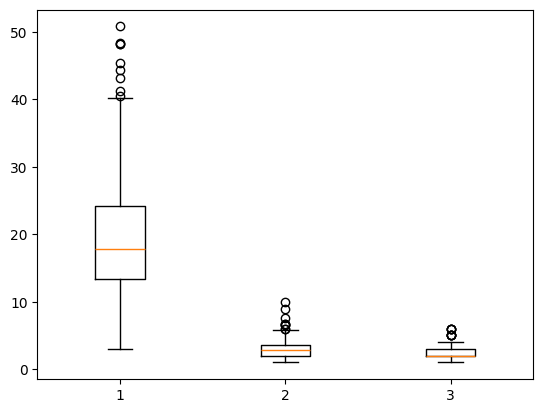

In [51]:
plt.boxplot(num)
plt.show()

In [52]:
num["total_bill"].skew()

np.float64(1.1332130376158205)

In [53]:
# This column is skewed

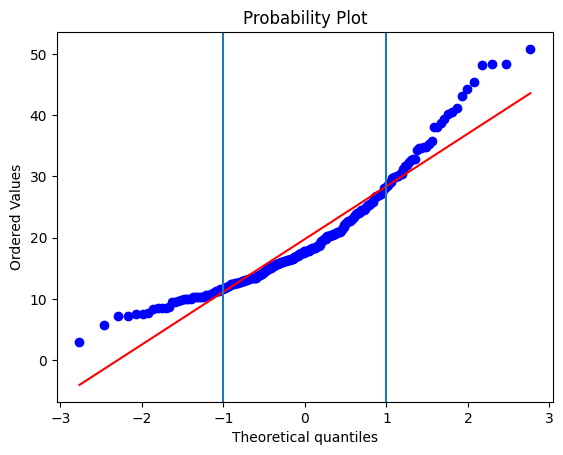

In [54]:
from scipy.stats import probplot

probplot(num["total_bill"], plot=plt)
plt.axvline(-1)
plt.axvline(1)
plt.show()

<Axes: ylabel='Density'>

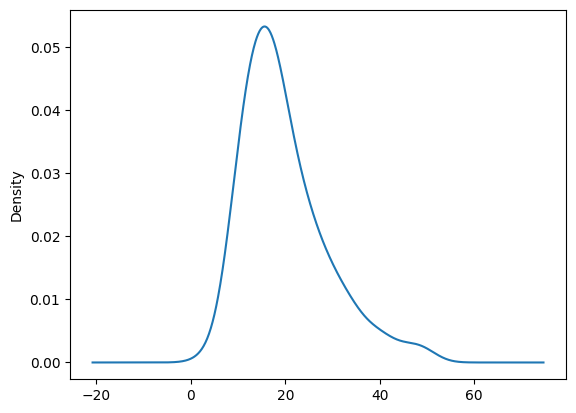

In [55]:
df["total_bill"].plot(kind="kde")

In [56]:
# IQR

In [95]:
def iqr(col: pd.Series):
    """Will calculate and return IQR along with Q1 and Q3

    Args:
        col (_type_): Any Skewed Column of the df
    """
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    return iqr, ub, lb

In [58]:
IQR, ub, lb = iqr(df["total_bill"])

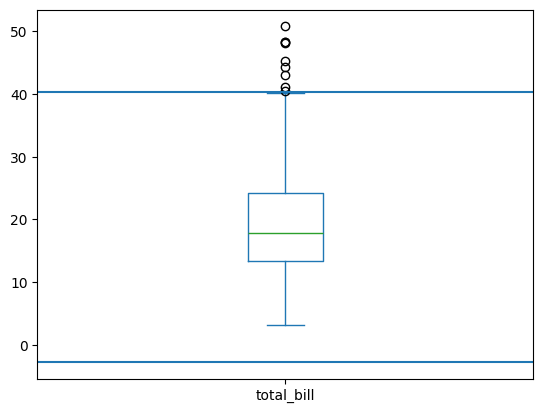

In [59]:
num["total_bill"].plot(kind="box")
plt.axhline(ub)
plt.axhline(lb)
plt.show()

In [60]:
# Trimming using IQR

<Axes: >

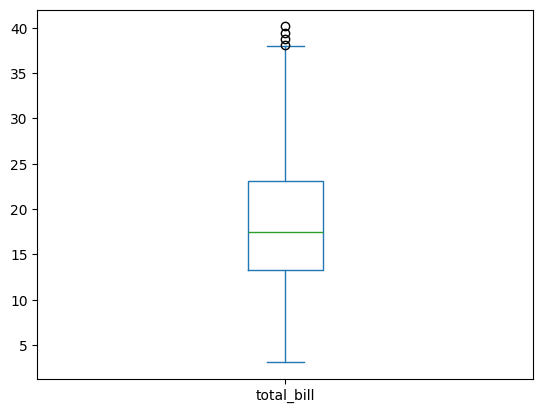

In [61]:
num[num["total_bill"] < ub]["total_bill"].plot(kind="box")

In [62]:
df = df[(df["total_bill"] < ub) & (df["total_bill"] >= lb)]

In [63]:
# df["total_bill"].plot(kind="box")
# plt.axhline(ub)
# plt.show()

In [64]:
iqr, upper, lower = iqr(df["total_bill"])

In [65]:
lower

np.float64(-1.6650000000000027)

In [66]:
df = df[df["total_bill"] < upper]

<Axes: >

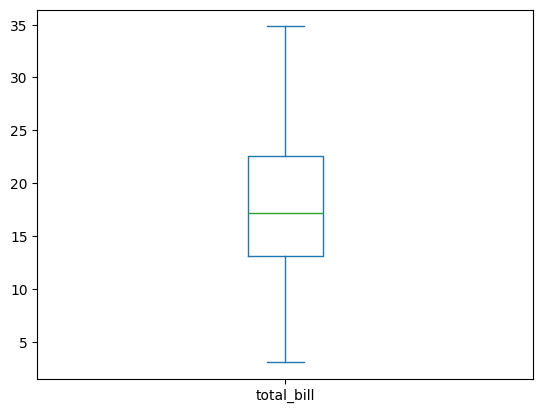

In [70]:
df[df["total_bill"] < 35]["total_bill"].plot(kind="box")

In [72]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [76]:
# Z-Score

df["tip"].skew()

np.float64(0.8494027163446525)

In [80]:
mu = df["tip"].mean()
sigma = df["tip"].std()


def Z_Score(x):
    """Calculate the Z-Score of a column

    Args:
        col (pd.Series): Any Non-Skewed Column from the DF
    """
    # X - mu / sigma
    return (x - mu) / sigma

In [83]:
# df["tip"].plot(kind="box")

In [87]:
df = df[(df["tip"].apply(Z_Score) <= 3) & (df["tip"].apply(Z_Score) >= -3)]

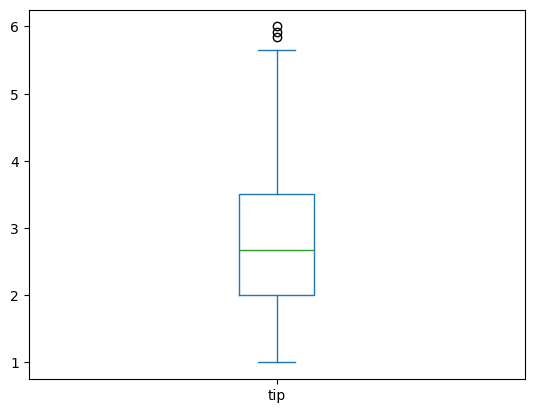

In [92]:
df[(df["tip"].apply(Z_Score) <= 3) & (df["tip"].apply(Z_Score) >= -3)]["tip"].plot(
    kind="box"
)
plt.show()

In [93]:
new_df = sns.load_dataset("tips")

In [101]:
IQR, upper, lower = iqr(new_df["total_bill"])

In [106]:
new_df[new_df["total_bill"] > upper]["total_bill"].values

array([48.27, 44.3 , 41.19, 48.17, 50.81, 45.35, 40.55, 43.11, 48.33])

In [111]:
a = np.arange(0, 100)

In [ ]:
# np.where(cond,true,false)

In [114]:
np.where(a > 50, "Hello", a)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', 'Hello', 'Hello', 'Hello', 'Hello',
       'Hello', 'Hello', 'Hello', 'Hello', 'Hello', 'Hello', 'Hello',
       'Hello', 'Hello', 'Hello', 'Hello', 'Hello', 'Hello', 'Hello',
       'Hello', 'Hello', 'Hello', 'Hello', 'Hello', 'Hello', 'Hello',
       'Hello', 'Hello', 'Hello', 'Hello', 'Hello', 'Hello', 'Hello',
       'Hello', 'Hello', 'Hello', 'Hello', 'Hello', 'Hello', 'Hello',
       'Hello', 'Hello', 'Hello', 'Hello', 'Hello', 'Hello', 'Hello',
       'Hello', 'Hello', 'Hello'], dtype='<U21')

In [119]:
# Capping
new_df["total_bill"] = np.where(
    new_df["total_bill"] > upper,
    upper,
    np.where(new_df["total_bill"] < lower, lower, new_df["total_bill"]),
)

<Axes: >

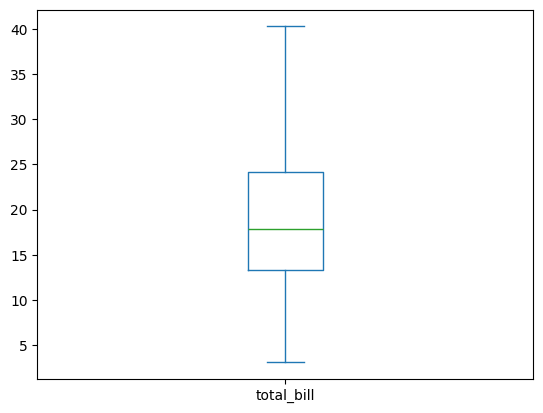

In [120]:
new_df["total_bill"].plot(kind="box")

In [122]:
df3 = sns.load_dataset("tips")

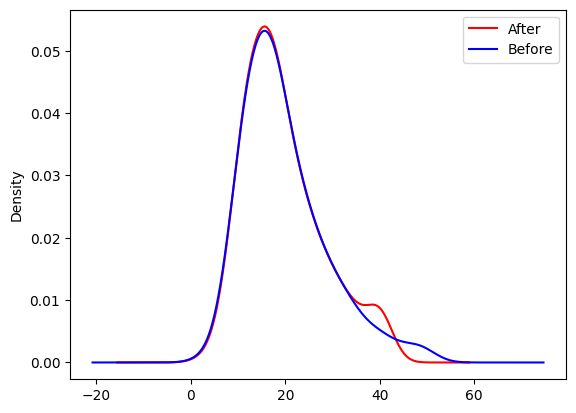

In [124]:
new_df["total_bill"].plot(kind="kde", label="After", color="red")
df3["total_bill"].plot(kind="kde", label="Before", color="blue")
plt.legend()
plt.show()

In [125]:
ucb = np.percentile(df["total_bill"], 99)

In [126]:
ucb

np.float64(35.143899999999995)